# Pandas

The Pandas software library is used to provide R-like DataFrames to Python users. It also provides much of the functionality of spreadsheet software such as Excel. 

DataFrames are core the functionality of Pandas, and in this notebook we shall work primarily with DataFrames and learn how they can be used to manipulate and edit data.

First we begin by importing Pandas (along with a number of other dependencies that we will use). Pandas is imported as `pd` by convention.

In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import andrews_curves
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

To demonstrate Panda's functionality, we will use load the well-known Iris dataset. This dataset contains 150 samples of **three** species of Iris plant. 

In [2]:
df = pd.DataFrame(datasets.load_iris().data)

To examine the first few rows of the dataset, we can use the `head()` or `tail()` functions: 

In [3]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


To aid readibility we can assign titles to the columns. Each column in the Iris dataset refers to one feature of the dataset. These features are the *Sepal length*, *Sepal width*, *Petal length*, and *Petal width*. We can give the columns names by assigning a list to the DataFrame object's `columns` member variable:

In [4]:
df.columns = ["sepal_l", "sepal_w", "petal_l", "petal_w"]
df.tail()

,sepal_l,sepal_w,petal_l,petal_w
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


Each sample in the Iris dataset is a member of one of three species, either Iris setosa, Iris virginica, or Iris versicolor. We will now add a new column to our DataFrame `df` named `species`. We will first gather each sample's species and then add this to a new column in `df`:

In [5]:
names_col = [datasets.load_iris().target_names[x] for x in datasets.load_iris().target]

This introduces a concept called a list comprehension. This is a useful way of writing loops in one line.

We now assign this list of species to a new column in the `df` DataFrame that we will call `species`:

In [6]:
df['species'] = names_col

Another way to do this may be to replace the index based labels with descriptive strings using the DataFrame `loc` function, like the following:

In [7]:
df["species"] = datasets.load_iris().target
df.loc[df.species == 0, "species"] = "setosa"
df.loc[df.species == 1, "species"] = "versicolor"
df.loc[df.species == 2, "species"] = "virginica"

Now let's take a look at the first 10 rows of the `df` DataFrame:

In [8]:
df.head(10)

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Now that we have our data, we can begin with some analysis.

## Accessing Data with Pandas

Pandas provides much functionality for quickly accessing and extracting data in your DataFrames. 

For example to access a single column you can write:

In [9]:
df["sepal_l"].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_l, dtype: float64

Alternatively, we can access colums as if they were member variables:

In [10]:
df.sepal_l.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_l, dtype: float64

We can access a single item by using multiple brackets:

In [11]:
df["sepal_l"][0]

5.0999999999999996

The `loc` and `iloc` functions allow you to find the locations of items in a DataFrame. The `loc` function is used to retrieve items using labels, while `iloc` is used to retrieve items using indices. Here we access the first row of the DataFrame (we first specify the rows we require, followed by the columns):

In [12]:
df.iloc[0]

sepal_l       5.1
sepal_w       3.5
petal_l       1.4
petal_w       0.2
species    setosa
Name: 0, dtype: object

We first specify the rows, then the columns:

In [13]:
df.loc[:3, "sepal_l"]

0    5.1
1    4.9
2    4.7
3    4.6
Name: sepal_l, dtype: float64

Here we retrieve the first 5 rows of the DataFrame:

In [14]:
df[:5]

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Or rows 15-20 and columsn 2-4:

In [15]:
df.iloc[15:21, 2:5]

,petal_l,petal_w,species
15,1.5,0.4,setosa
16,1.3,0.4,setosa
17,1.4,0.3,setosa
18,1.7,0.3,setosa
19,1.5,0.3,setosa
20,1.7,0.2,setosa


You may want to quickly view some information about the DataFrame, and this can be done using the `describe` function:

In [16]:
df.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Sorting is possible using the `sort_values` function:

In [17]:
df.sort_values(by="sepal_l", ascending=True).head()

,sepal_l,sepal_w,petal_l,petal_w,species
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa


A powerful feature of Pandas is the ability to use conditionals within the square brackets when retrieving data:

In [18]:
df[df.sepal_l > 7]

,sepal_l,sepal_w,petal_l,petal_w,species
102,7.1,3.0,5.9,2.1,virginica
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
109,7.2,3.6,6.1,2.5,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
125,7.2,3.2,6.0,1.8,virginica
129,7.2,3.0,5.8,1.6,virginica
130,7.4,2.8,6.1,1.9,virginica


In [19]:
len(df[df.sepal_l > 7])

12

We can see tha 12 items were retrieved. We can replace these values with `NaN` (Not a number) values and then drop these rows to demonstrate how you might clean up a data set that contains missing values:

In [20]:
# First we make a copy so that we can use df later
# Note: if you were to say df_nan = df you would not get a new copy of the data! 
df_nan = df.copy(deep=True) 

# Replace any value in the DataFrame that is greater than 7 with NaN
df_nan[df_nan.sepal_l > 7] = np.NaN

# Drop these values and 
df_nan = df_nan.dropna(how="any")
len(df_nan)

138

We may wish to replace the missing values with a mean instead:

In [21]:
df_mean = df.copy(deep=True)
df_mean[df_mean.sepal_l > 7] = np.NaN
len(df_mean.fillna(df_mean.mean()))

150

As we have not dropped any values, the DataFrame still contains 150 elements.

## Plotting with Pandas

Pandas supports some useful plotting tools to quickly explore data. One such tool is the scatter matrix. 

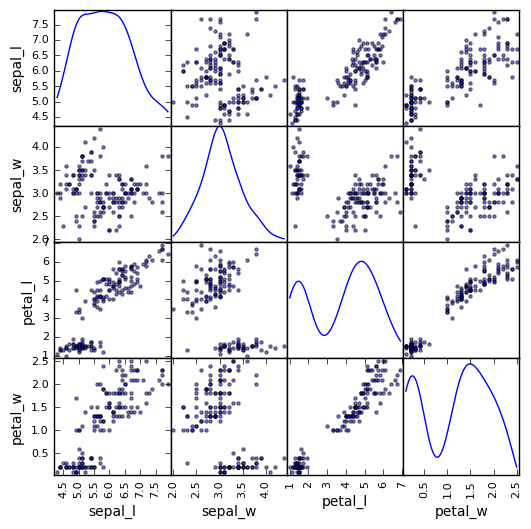

In [22]:
scatter_matrix(df, figsize=(6, 6), diagonal='kde');

Boxplots are equally easy to produce:

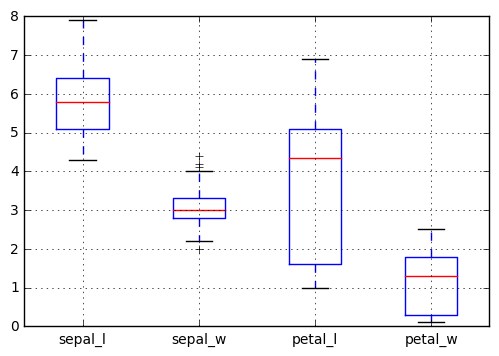

In [23]:
df.boxplot();

Or you may want to plot distributions: 

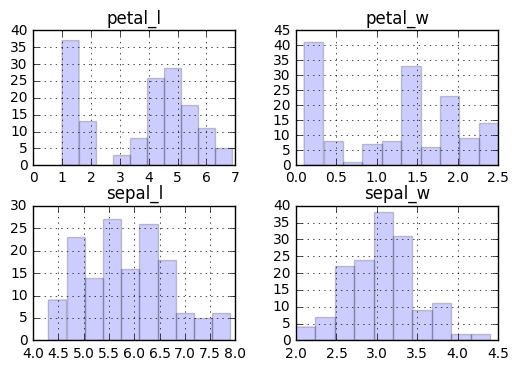

In [24]:
df.hist(alpha=0.2);

Or use the `group_by` function along with the `hist` function to see the distribution across the species of a particular feature (in this case `petal_l`):

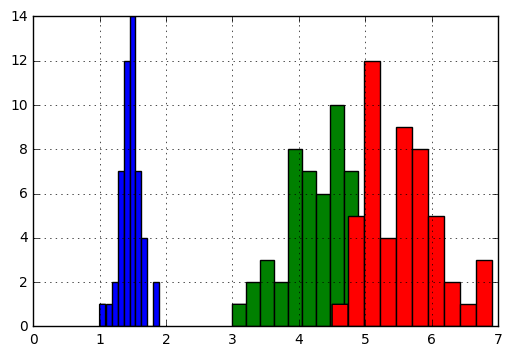

In [25]:
df.groupby('species').petal_l.hist(alpha=0.2);

Or plot a histograms for all features grouped by the species:

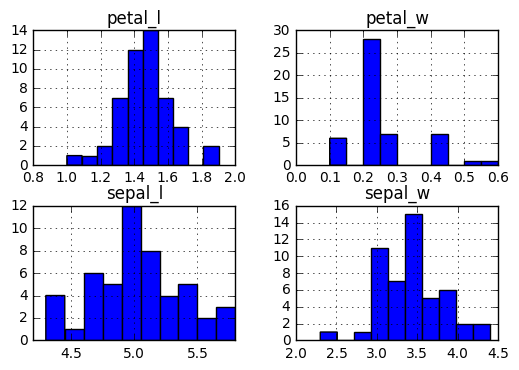

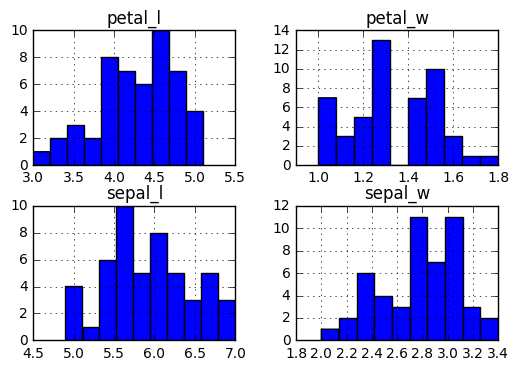

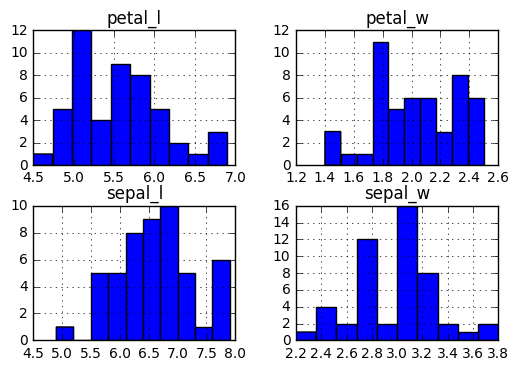

In [26]:
df.groupby('species').hist(alpha=0.1);

Other plotting techniques include Andrews plots, which can be created quickly:

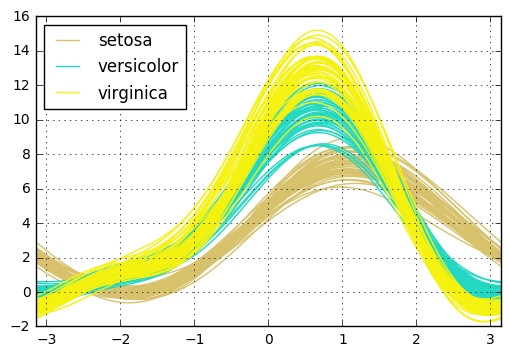

In [27]:
plt.figure();
andrews_curves(df, "species")
plt.legend(loc=2);